In [84]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('/content/car data.csv')

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [33]:
df.shape

(301, 9)

In [34]:
df.duplicated().sum()

2

In [35]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [37]:
df.shape

(299, 9)

In [38]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [39]:
df["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [40]:
df["Car_Name"].nunique()

98

In [41]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [42]:
df["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [43]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

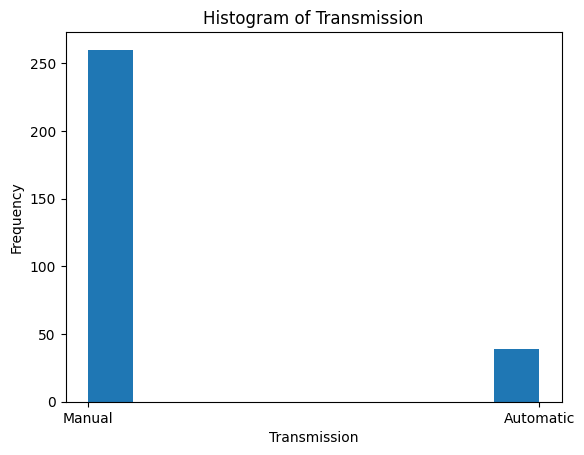

In [44]:

plt.hist(df['Transmission'])
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.title('Histogram of Transmission')
plt.show()


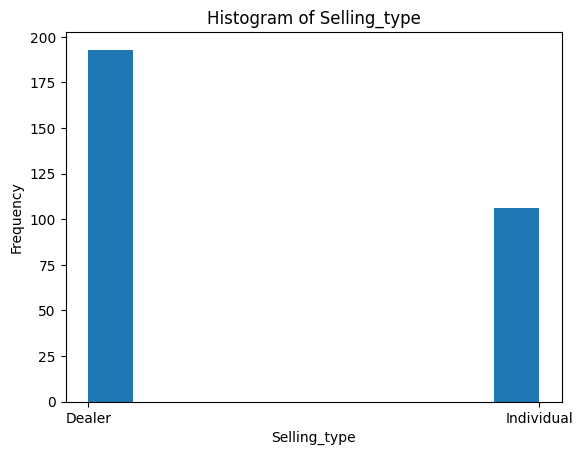

In [45]:
plt.hist(df['Selling_type'])
plt.xlabel('Selling_type')
plt.ylabel('Frequency')
plt.title('Histogram of Selling_type')
plt.show()


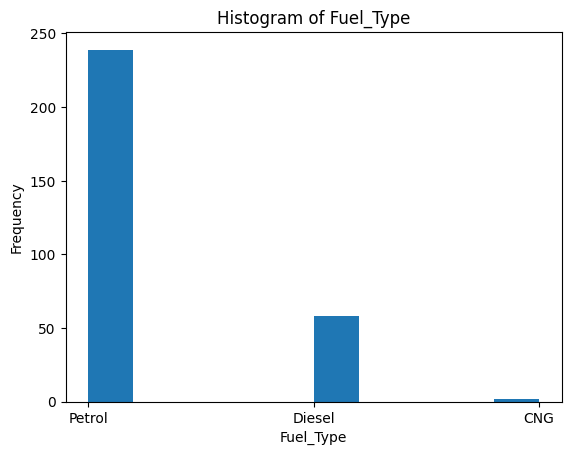

In [46]:
plt.hist(df['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('Frequency')
plt.title('Histogram of Fuel_Type')
plt.show()

In [47]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

<Axes: >

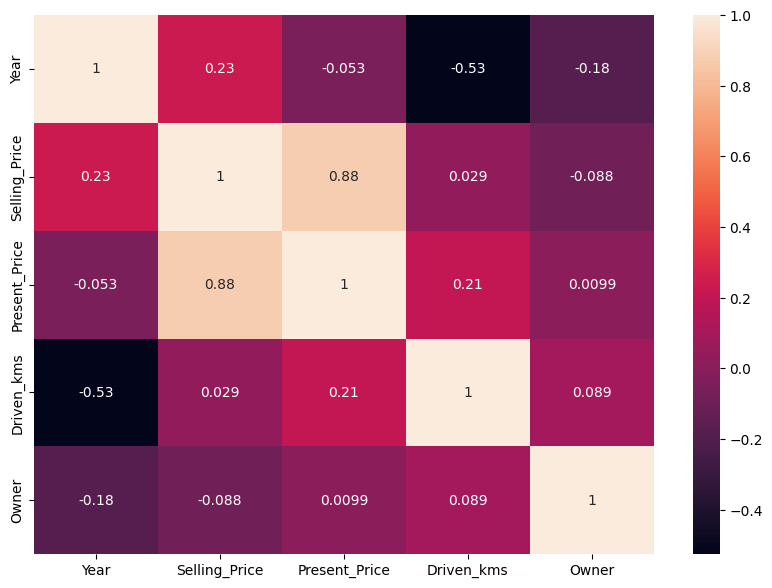

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical_columns].corr(), annot = True)

<Figure size 1000x600 with 0 Axes>

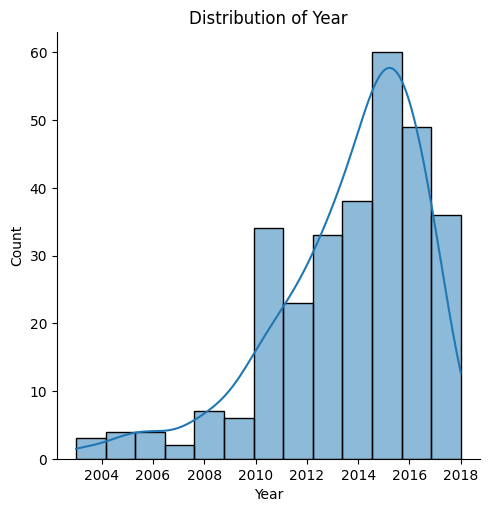

<Figure size 1000x600 with 0 Axes>

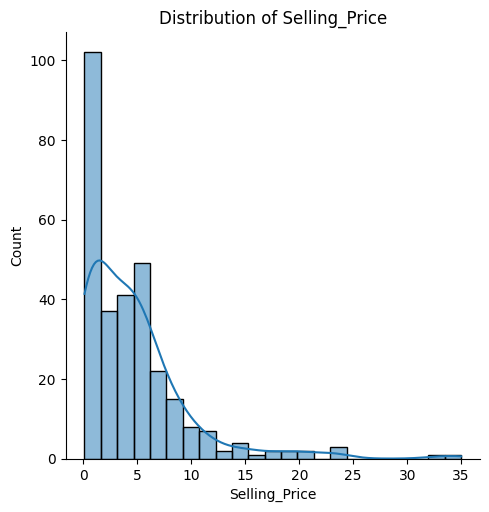

<Figure size 1000x600 with 0 Axes>

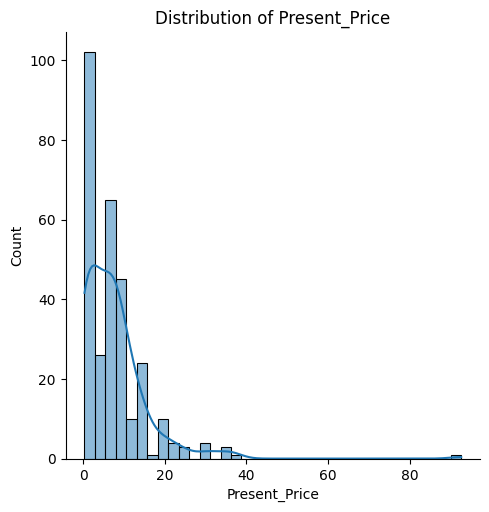

<Figure size 1000x600 with 0 Axes>

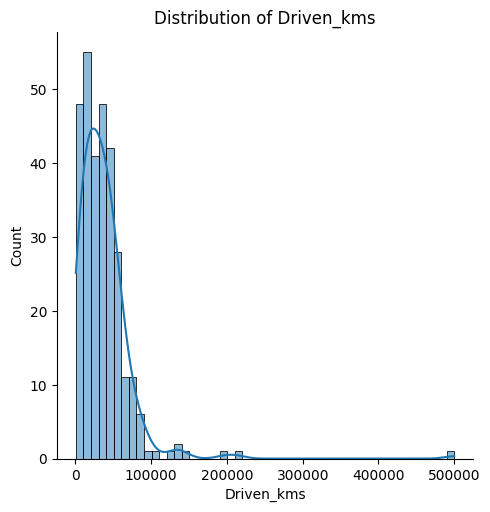

<Figure size 1000x600 with 0 Axes>

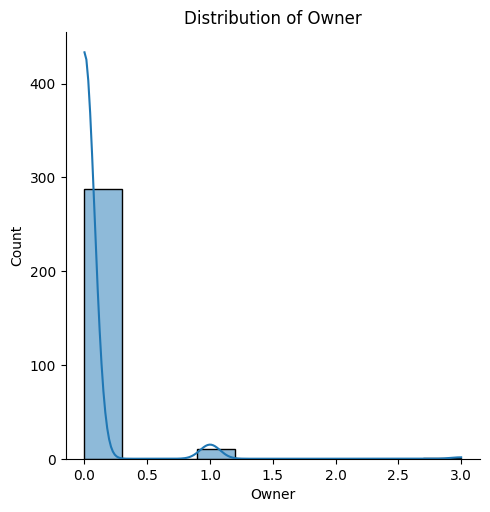

In [49]:

for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

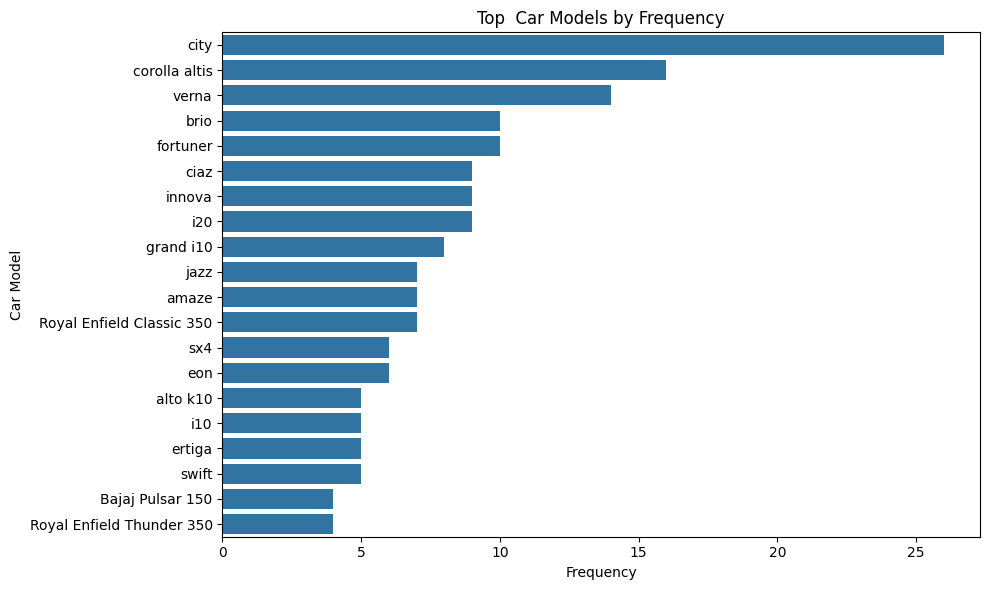

In [55]:
top_car_models = df['Car_Name'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top  Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

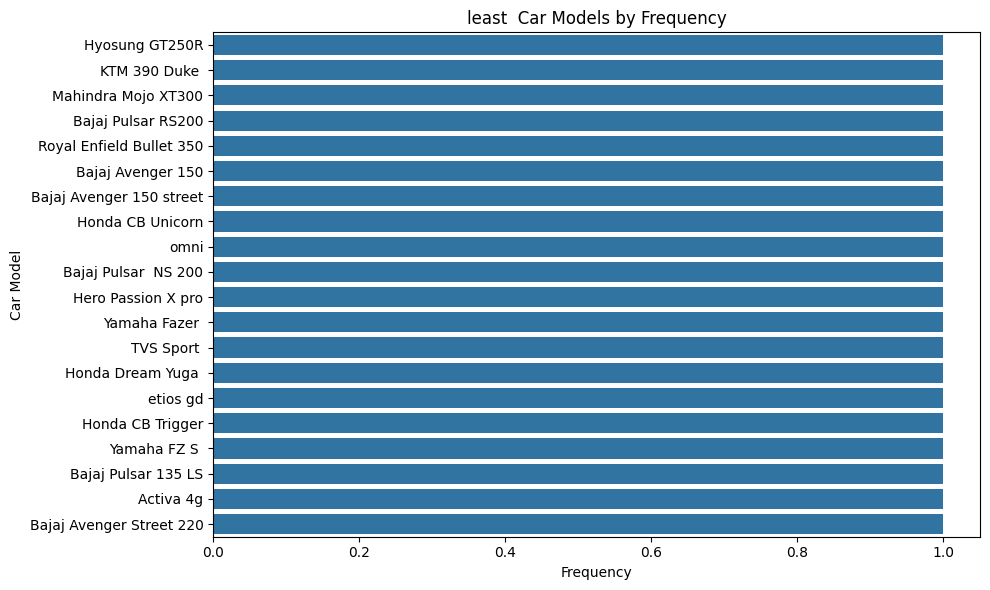

In [56]:
least_car_models = df['Car_Name'].value_counts().tail(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=least_car_models.values, y=least_car_models.index)
plt.title(f'least  Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

<ipython-input-57-54aa2b52017f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')


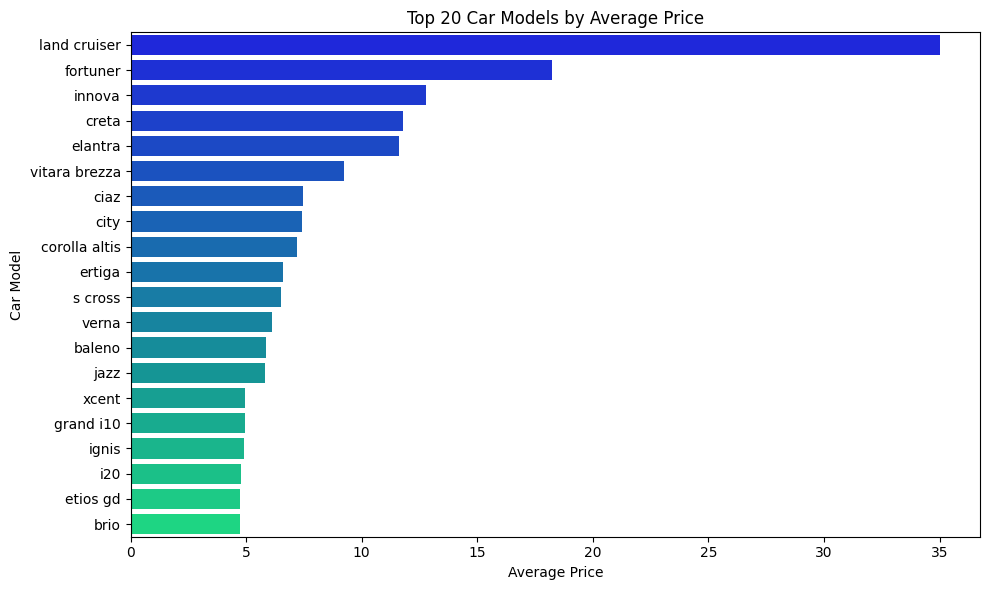

In [57]:

avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)


top_car_models = avg_prices_by_car.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top 20 Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

<ipython-input-61-0c344f7cb002>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_car_models.values, y=least_car_models.index,palette='winter')


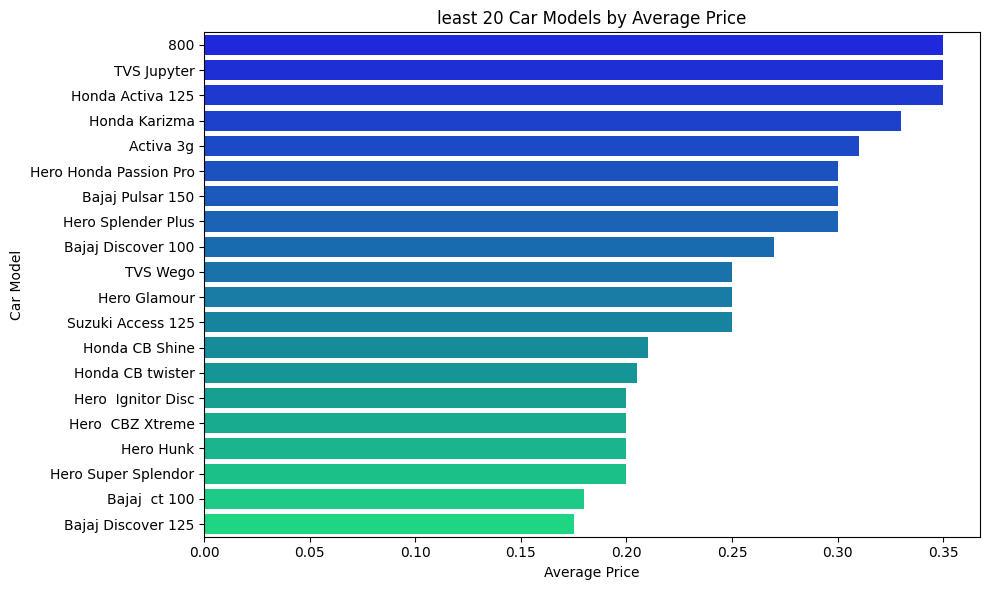

In [61]:

avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)


least_car_models = avg_prices_by_car.tail(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=least_car_models.values, y=least_car_models.index,palette='winter')
plt.title(f'least 20 Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

<ipython-input-63-5c6bc1b43ca8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')


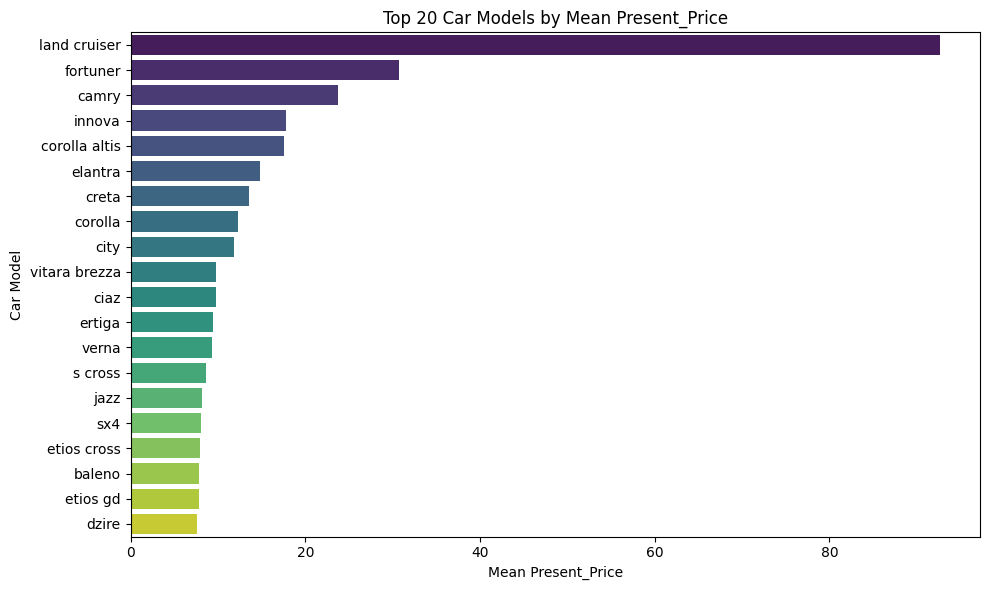

In [63]:
top_car_models = df.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')
plt.title(f'Top 20 Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

<ipython-input-64-6145fdf8518f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_car_models.values, y=least_car_models.index, palette='viridis')


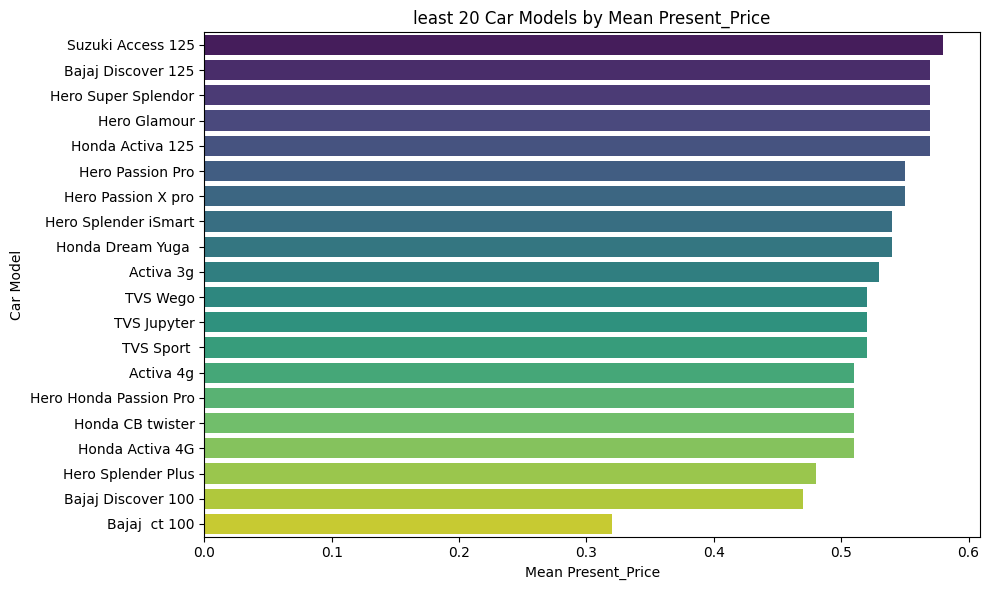

In [64]:
least_car_models = df.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending=False).tail(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_car_models.values, y=least_car_models.index, palette='viridis')
plt.title(f'least 20 Car Models by Mean Present_Price')
plt.xlabel('Mean Present_Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [65]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


In [66]:
df['Selling_type'].value_counts()

,count
Selling_type,
Dealer,193
Individual,106


In [67]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,260
Automatic,39


In [104]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [105]:
mean_traini = mean_absolute_error(y_train, y_pred)
print(mean_traini)
test_mae =  mean_absolute_error(y_test, model.predict(X_test))
print(test_mae)

0.00010224988975852312
2.2384706780609274


In [106]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (239, 7)
X_test shape: (60, 7)
y_train shape: (239,)
y_test shape: (60,)


In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_train)


In [131]:
y_pred_baseline = [y_mean] * len(y_test)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print(mae_baseline)
mean_traini = mean_absolute_error(y_train, y_pred)
print(mean_traini)
test_mae =  mean_absolute_error(y_test, model.predict(X_test))
print(test_mae)

3.3269470013947005
1.0511680218224388
1.5408119549692763


In [132]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 6.68
Root Mean Squared Error: 2.58
R-squared: 0.74


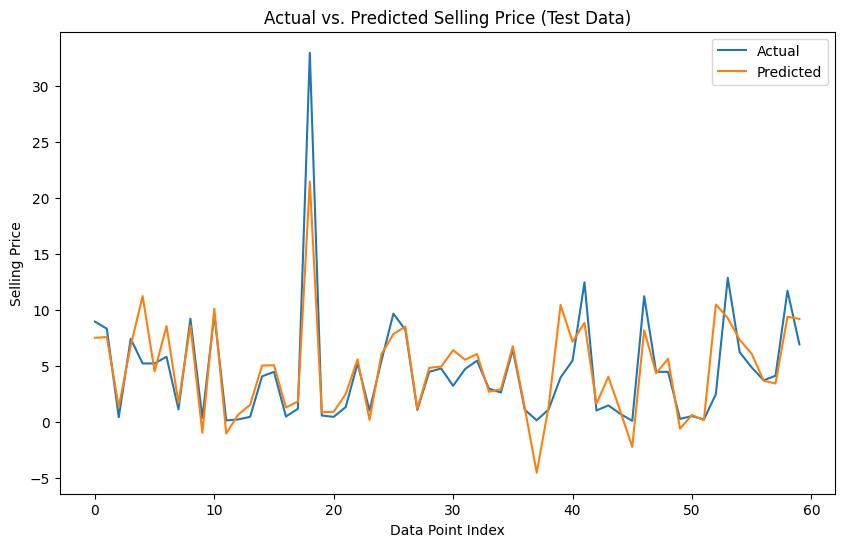

In [134]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Selling Price')
plt.title('Actual vs. Predicted Selling Price (Test Data)')
plt.legend()
plt.show()


In [136]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})
act_predict.head(20)

,Actual,Predict
0,8.99,7.540145
1,8.35,7.607943
2,0.45,1.360867
3,7.45,6.838162
4,5.25,11.264332
5,5.25,4.543315
6,5.85,8.583769
7,1.15,1.707565
8,9.25,8.645293
9,0.38,-0.941602


In [137]:
y_test_pred =pd.Series(model.predict(X_test))
y_test_pred.head()

,0
0,7.540145
1,7.607943
2,1.360867
3,6.838162
4,11.264332


In [139]:
print(model.intercept_)
print(model.coef_)

-687.1977591188544
[ 3.42071393e-01  4.41254421e-01 -9.41472378e-06  1.22494762e+00
 -1.29057772e+00  1.57792987e+00  6.98019859e-01]


Decision Tree Regressor - Training MAE: 6.967926932793869e-19
Decision Tree Regressor - Test MAE: 1.1211666666666664
Decision Tree Regressor - Mean Squared Error: 4.49
Decision Tree Regressor - Root Mean Squared Error: 2.12
Decision Tree Regressor - R-squared: 0.83


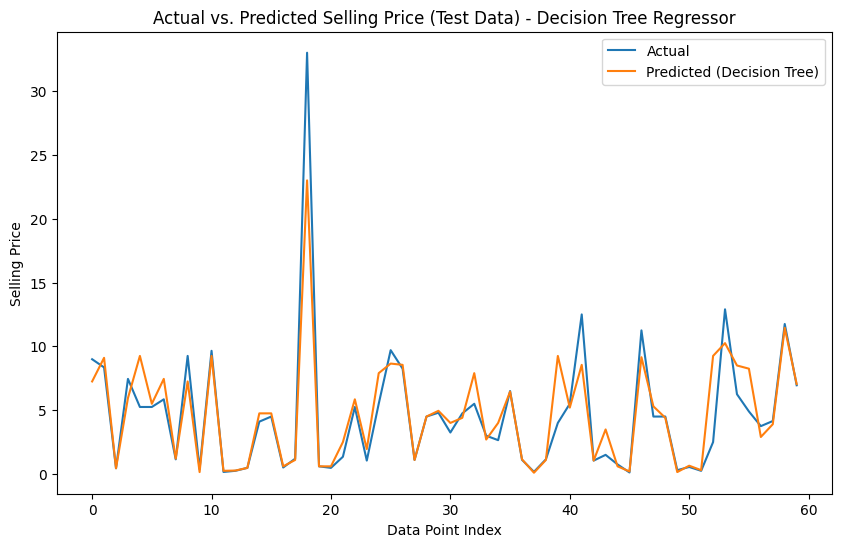

In [143]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)


y_train_pred_dt = dt_model.predict(X_train)


train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
print("Decision Tree Regressor - Training MAE:", train_mae_dt)

y_test_pred_dt = dt_model.predict(X_test)


test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
print("Decision Tree Regressor - Test MAE:", test_mae_dt)


mse_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)

print(f"Decision Tree Regressor - Mean Squared Error: {mse_dt:.2f}")
print(f"Decision Tree Regressor - Root Mean Squared Error: {rmse_dt:.2f}")
print(f"Decision Tree Regressor - R-squared: {r2_dt:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_dt, label='Predicted (Decision Tree)')
plt.xlabel('Data Point Index')
plt.ylabel('Selling Price')
plt.title('Actual vs. Predicted Selling Price (Test Data) - Decision Tree Regressor')
plt.legend()
plt.show()


In [145]:


import pandas as pd
act_predict_dt = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_test_pred_dt.flatten()
})
act_predict_dt.head(20)


,Actual,Predict
0,8.99,7.25
1,8.35,9.10
2,0.45,0.45
3,7.45,5.95
4,5.25,9.25
5,5.25,5.50
6,5.85,7.45
7,1.15,1.20
8,9.25,7.25
9,0.38,0.15


In [144]:


print(f"Linear Regression - Test MAE: {test_mae:.2f}")
print(f"Decision Tree Regressor - Test MAE: {test_mae_dt:.2f}")

if test_mae < test_mae_dt:
  print("Linear Regression performed better.")
else:
  print("Decision Tree Regressor performed better.")


Linear Regression - Test MAE: 1.54
Decision Tree Regressor - Test MAE: 1.12
Decision Tree Regressor performed better.
